# Analyzing the data from playlists

Playlist data has been taken in by the ```playlistData.py``` script and saved to csv files in the ```data``` directory. 

| Variable | Description |
|----------|-------------|
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) |
| Mode | Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| popularity | A numerical score between 0 and 100 representative of the popularity of a given track. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

datapath = './data/playlists/'

### Change the playlist here!

In [2]:
playlist = 'Paradise Valley'
playlist_good = playlist.replace(" ", "_")
playlist_good = playlist_good + '_data.csv'

df_playlist = pd.read_csv(datapath+playlist_good)
df_playlist.head()

,Unnamed: 0,song_id,title,artist,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,tempoNormalized,timeSignature,valence
0,0,2iuZJX9X9P0GKaE93xcPjk,Sugar,Maroon 5,0.05910,0.748,235493,0.788,0.000000,0.0863,-7.055,79,0.0334,120.076,0.578671,4,0.884
1,1,0k664IuFwVP557Gnx7RhIl,Juice,Lizzo,0.00611,0.767,195145,0.889,0.000000,0.4020,-2.988,80,0.0963,119.930,0.577968,4,0.843
2,2,4kbj5MwxO1bq9wjT5g9HaA,Shut Up and Dance,WALK THE MOON,0.00701,0.578,199080,0.866,0.000000,0.2570,-3.804,75,0.0619,128.038,0.617042,4,0.619
3,3,4orphgwPHHRsdEkfUmANSD,"Honey, I'm Good.",Andy Grammer,0.03780,0.753,199263,0.796,0.000000,0.3310,-6.406,6,0.0576,122.025,0.588064,4,0.605
4,4,6yl8Es1tCYD9WdSkeVLFw4,You Shook Me All Night Long,AC/DC,0.00224,0.529,210880,0.768,0.000685,0.2970,-5.510,70,0.0566,127.316,0.613562,4,0.769


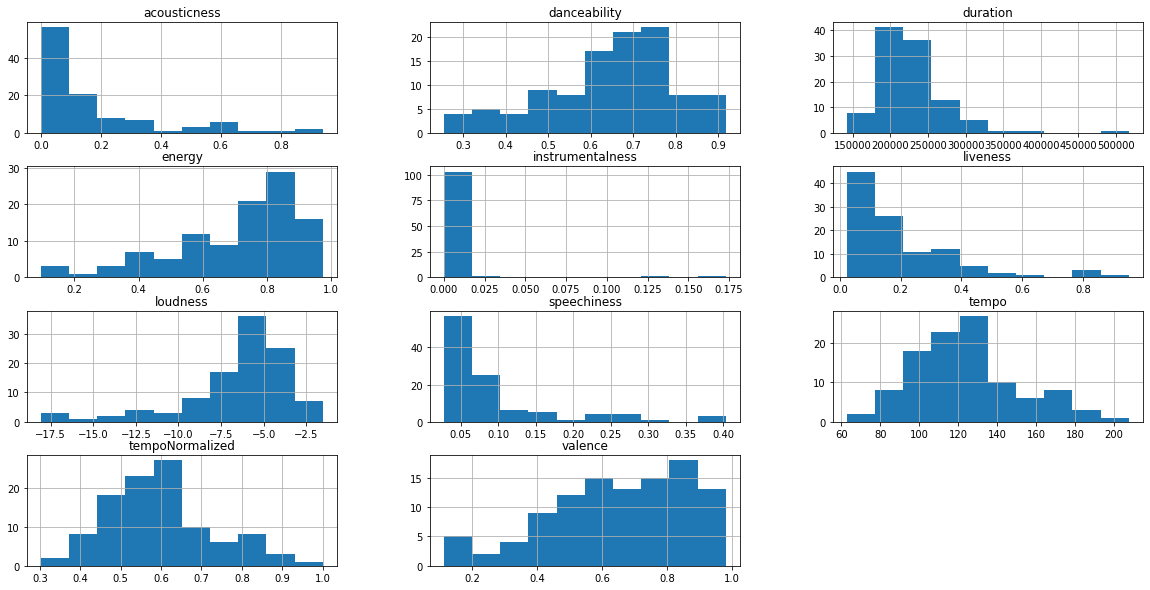

In [3]:
# feature breakdown
features = ['acousticness', 'danceability', 'instrumentalness', 
           'energy', 'speechiness','tempo','valence','duration',
           'liveness', 'loudness', 'tempoNormalized']

df_playlist[features].hist(figsize=(20,10))
plt.show()

## Clustering similar songs

In [4]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'tempoNormalized']
df_cluster = df_playlist[cluster_features]
df_cluster.head()

,acousticness,danceability,instrumentalness,energy,speechiness,tempoNormalized
0,0.05910,0.748,0.000000,0.788,0.0334,0.578671
1,0.00611,0.767,0.000000,0.889,0.0963,0.577968
2,0.00701,0.578,0.000000,0.866,0.0619,0.617042
3,0.03780,0.753,0.000000,0.796,0.0576,0.588064
4,0.00224,0.529,0.000685,0.768,0.0566,0.613562


<Figure size 1440x1080 with 0 Axes>

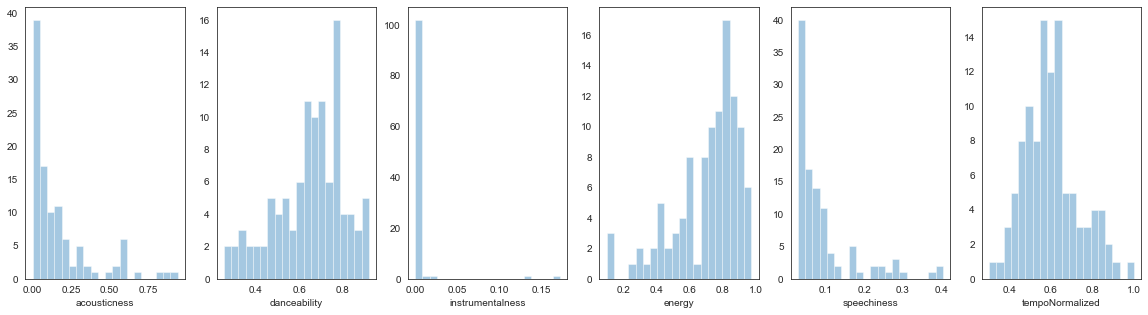

In [5]:
plt.figure(figsize=(20,15))

sns.set_style('white')
fig, axes = plt.subplots(1,6, figsize=(20,5))
for i, feature in enumerate(cluster_features):
    sns.distplot(df_cluster[feature], ax=axes[i], bins=20, kde=False)
    
plt.show()

In [6]:
# The idea behind StandardScaler is that it will transform your data 
# such that its distribution will have a mean value 0 and standard deviation of 1.

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

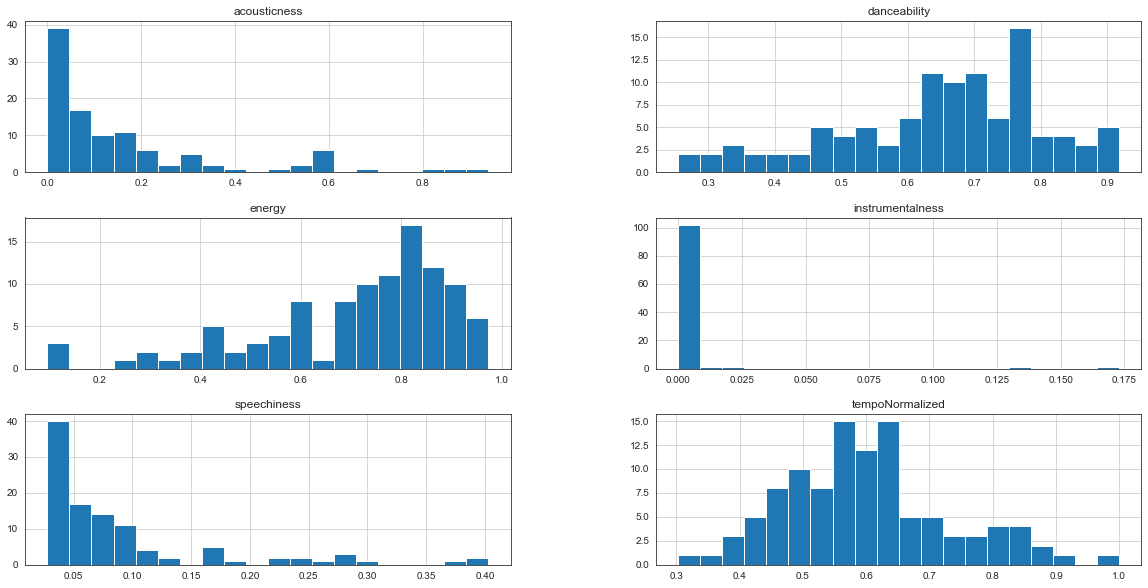

In [7]:
df_cluster.hist(figsize=(20,10), bins = 20)
plt.show()

In [8]:
# The idea behind StandardScaler is that it will transform your data 
# such that its distribution will have a mean value 0 and standard deviation of 1.

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


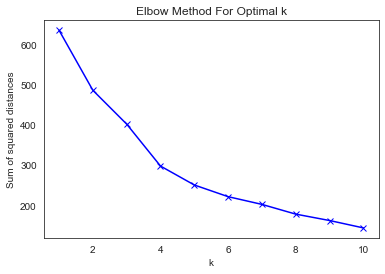

In [9]:
# Elbow method for determining number of clusters for kmeans clustering
# Uses sum of squared distances from mean

ss_dist = []

# Potential k
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
    
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()    # looks like 4 clusters

# Chose based on 'elbow' for the check. This is the point where the information
# gain/loss from additional clusters decreases dramatically. Not an exact science

In [10]:
# Adjust num_clusters for actual data
num_clusters = 4
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)

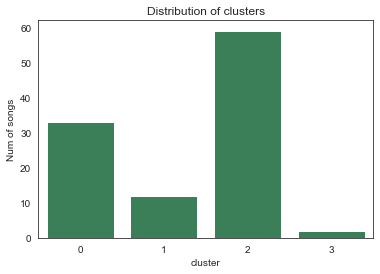

In [11]:
# assign cluster labels to dataframe
df_playlist.loc[:,'cluster'] = kmeanModel.labels_

df_cluster_size = df_playlist.groupby('cluster').size().reset_index(name='Num of songs')

sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

## Characteristics of the clusters

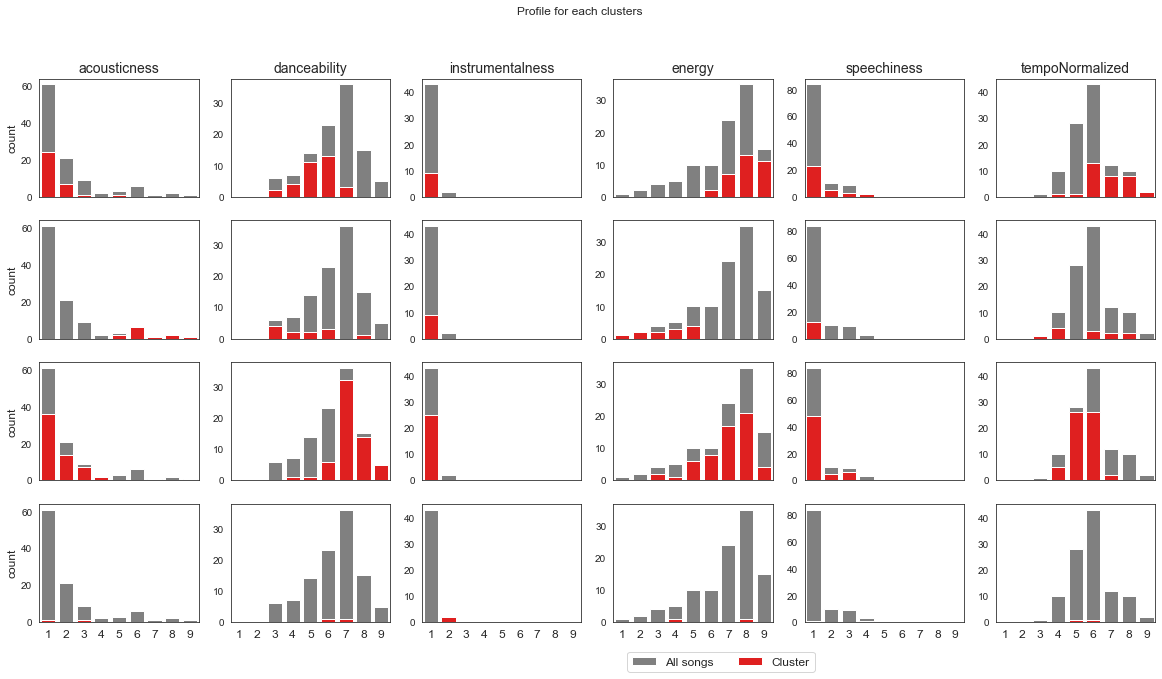

In [12]:
# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
fig, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialize 1st row. Representing cluster
row = 0
for cluster in np.sort(df_playlist['cluster'].unique()):
    #filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df_playlist[df_playlist['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
        #create binned count for all saved df and clustered df
        saved_grp = df_playlist.groupby(pd.cut(df_playlist[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
        # plot overall distribution and cluster distribution on the ax
        sns.barplot(data=saved_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col], label = 'All songs')
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col], label = 'Cluster')
        
        # configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
fig.suptitle('Profile for each clusters')
    

plt.legend(loc='best', bbox_to_anchor=(-1.1, -0.2), ncol=5, fontsize=12)
plt.show()

Each Row represents the cluster and the each Column represents the feature. The grey bar represents the distribution of the feature. This allows us to get a rough idea of the distribution of the feature. The red bar represents the distribution of the feature in that cluster which is used to compare against the other clusters.
When we look at the distribution of each cluster we can see that each cluster is high or low in certain features. This is identified by whether the red bar is on the right(high) or left(low) with respect to the grey bar. From these characteristics we can profile them and even come up with a cluster identity.

## Radar charts of clusters

In [13]:
from math import pi, ceil

In [14]:
# calculating the mean of the variables to get an 'average song' for a cluster
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df_playlist[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()

In [15]:
# radar plot example https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

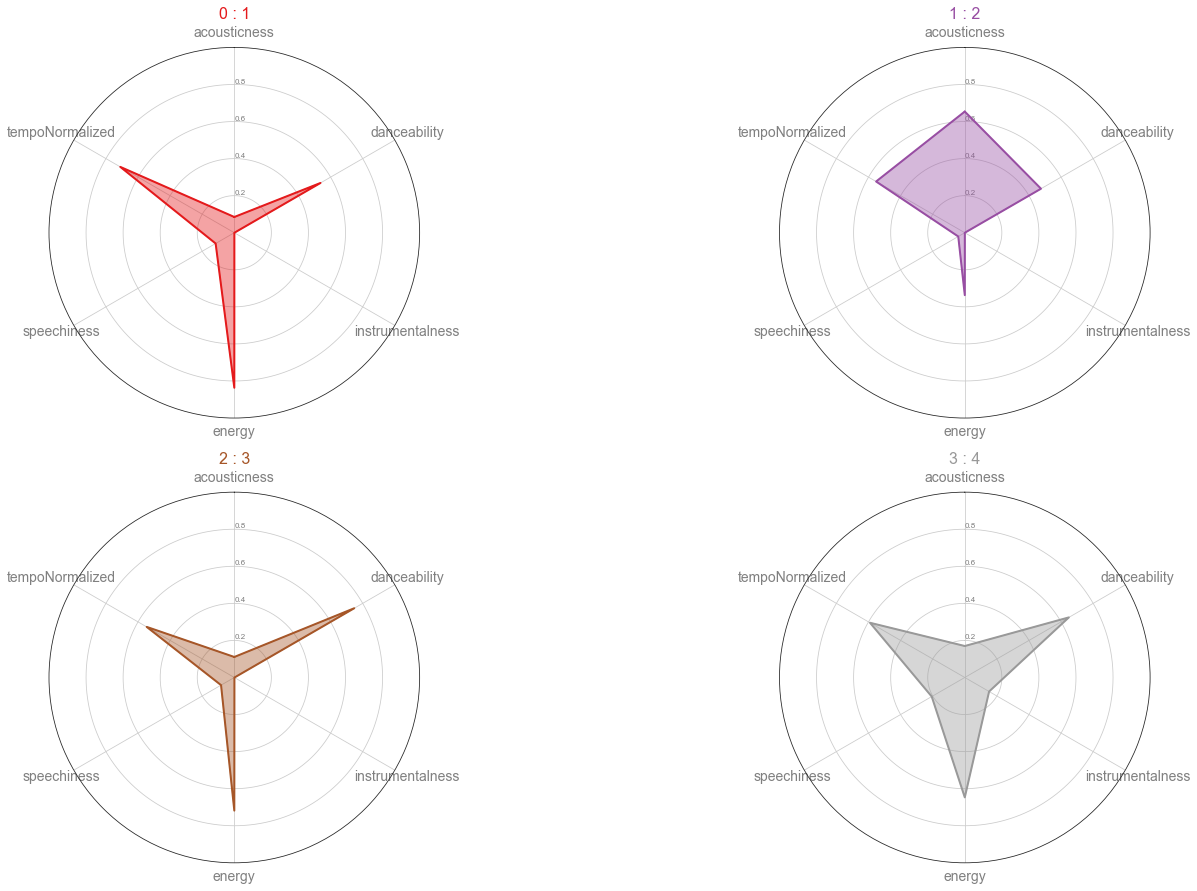

In [16]:
# initialize the figure
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set1", len(df_radar.index))

# Create cluster name
title_list = ['1', '2', '3', '4']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

## Modeling

To do this right, I'll need a playlist of songs that I don't like. This will let me assign a score to the songs to use as a target for the modeling. For now, I'll just use another playlist that's kinda different.

In [17]:
playlist = 'Porch Swing'
playlist_bad = playlist.replace(" ", "_")
playlist_bad = playlist_bad + '_data.csv'

df_playlist_bad = pd.read_csv(datapath+playlist_bad)
df_playlist_bad.head()

,Unnamed: 0,song_id,title,artist,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,tempoNormalized,timeSignature,valence
0,0,2xYlyywNgefLCRDG8hlxZq,"Take Me Home, Country Roads - Rerecorded",John Denver,0.546,0.255,197813,0.430,0.000019,0.188,-12.564,30,0.0322,164.267,0.829560,4,0.546
1,1,5HVHKtP234OzwCSrZlVS30,"Down To The River To Pray - From “O Brother, W...",Alison Krauss,0.965,0.535,176920,0.174,0.000000,0.145,-14.668,1,0.0796,131.407,0.663615,4,0.634
2,2,6lUdVNFaHD1PEnuZEdWMk9,I Am A Man Of Constant Sorrow - From “O Brothe...,The Soggy Bottom Boys,0.685,0.547,189867,0.316,0.000000,0.118,-13.056,2,0.0282,86.034,0.434478,4,0.770
3,3,4HpMusU5atCxGoSAiutaS4,I Am A Man Of Constant Sorrow - From “O Brothe...,Norman Blake,0.937,0.420,269373,0.249,0.845000,0.161,-18.160,0,0.0468,131.912,0.666165,4,0.640
4,4,5JpM7UKO7AtjRdoWQrH60s,"Keep On The Sunny Side - From “O Brother, Wher...",The Whites,0.786,0.654,215280,0.239,0.000001,0.129,-13.004,0,0.0290,95.829,0.483943,4,0.777


In [18]:
df_playlist['target'] = 1
df_playlist_bad['target'] = 0

In [19]:
# Stack the DataFrames on top of each other
trainingData = pd.concat([df_playlist, df_playlist_bad], axis=0)
trainingData.head()

,Unnamed: 0,song_id,title,artist,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,tempoNormalized,timeSignature,valence,cluster,target
0,0,2iuZJX9X9P0GKaE93xcPjk,Sugar,Maroon 5,0.05910,0.748,235493,0.788,0.000000,0.0863,-7.055,79,0.0334,120.076,0.578671,4,0.884,2.0,1
1,1,0k664IuFwVP557Gnx7RhIl,Juice,Lizzo,0.00611,0.767,195145,0.889,0.000000,0.4020,-2.988,80,0.0963,119.930,0.577968,4,0.843,2.0,1
2,2,4kbj5MwxO1bq9wjT5g9HaA,Shut Up and Dance,WALK THE MOON,0.00701,0.578,199080,0.866,0.000000,0.2570,-3.804,75,0.0619,128.038,0.617042,4,0.619,0.0,1
3,3,4orphgwPHHRsdEkfUmANSD,"Honey, I'm Good.",Andy Grammer,0.03780,0.753,199263,0.796,0.000000,0.3310,-6.406,6,0.0576,122.025,0.588064,4,0.605,2.0,1
4,4,6yl8Es1tCYD9WdSkeVLFw4,You Shook Me All Night Long,AC/DC,0.00224,0.529,210880,0.768,0.000685,0.2970,-5.510,70,0.0566,127.316,0.613562,4,0.769,0.0,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(trainingData, test_size = 0.15)
print("Training size: {}, Test size: {}".format(len(train),len(test)))

Training size: 124, Test size: 22


In [22]:
#print(trainingData.columns)

model_features = ['acousticness','danceability', 'duration', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'popularity', 'speechiness', 'tempo',
                  'timeSignature', 'valence']

In [23]:
#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[model_features]
y_train = train["target"]

x_test = test[model_features]
y_test = test["target"]

### Decision Tree

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
import graphviz
import pydotplus
import io
from scipy import misc

In [31]:
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(x_train, y_train)

In [32]:
def show_tree(InputTree, model_features, path):
    f = io.StringIO()
    tree.export_graphviz(InputTree, out_file=f, feature_names=model_features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


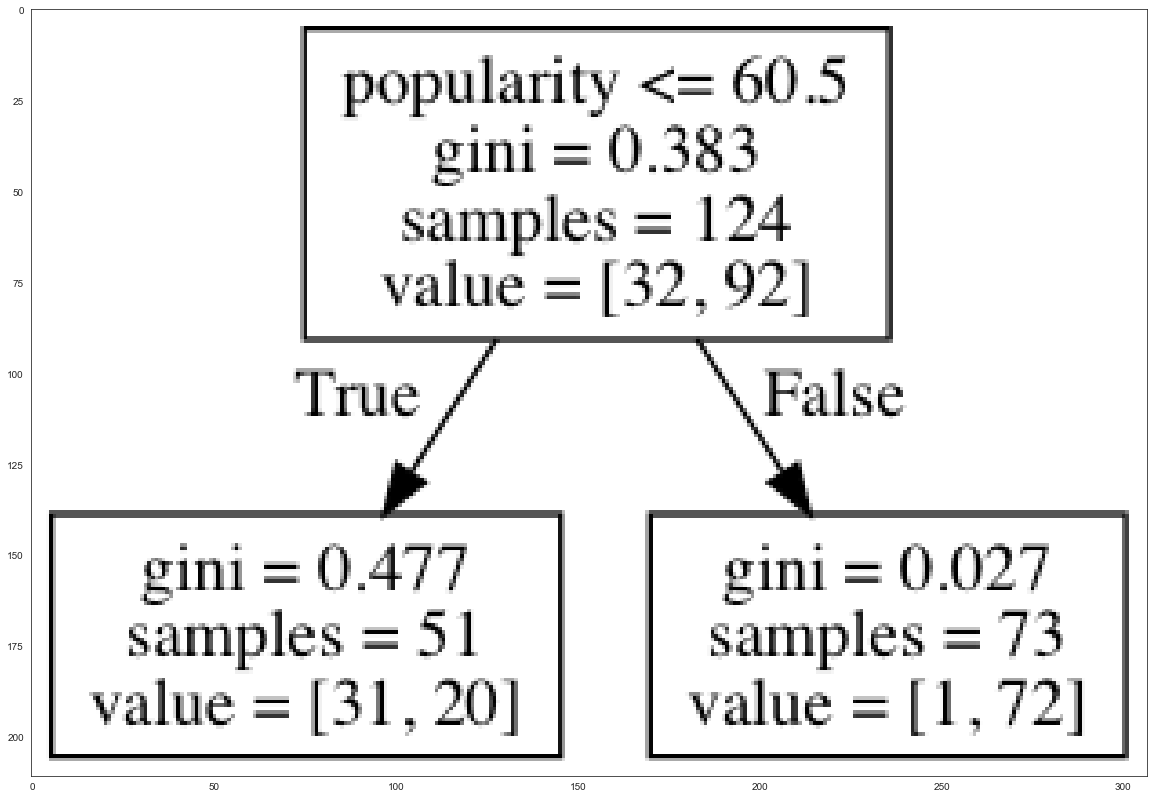

In [33]:
show_tree(dt, model_features, "dec_tree.png")

This is a weird decision tree. I think this is likely due to my weird playlist choice.

In [34]:
y_pred = c.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  77.3 %


Okay, works decently well though to identify songs to add to my wedding playlist.

### Other models

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(x_train, y_train)

predicted= k_means.predict(x_test)
score = accuracy_score(y_test, predicted)*100

print("Accuracy using Kmeans: ", round(score, 1), "%")

Accuracy using Kmeans:  13.6 %


In [37]:
knn = KNeighborsClassifier(4)
knn.fit(x_train, y_train)

knn_pred = c.predict(x_test)
score = accuracy_score(y_test, knn_pred) * 100

print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  77.3 %


In [38]:
gauss = GaussianNB()
gauss.fit(x_train, y_train)

gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100

print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  77.3 %


In [40]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100

print("Accuracy using GBC: ", round(score, 1), "%")

Accuracy using GBC:  86.4 %


In [42]:
logReg = LogisticRegression(random_state=0)
logReg.fit(x_train, y_train)

logistic_predicted = logReg.predict(x_test)
score = accuracy_score(y_test, predicted)*100

print("Accuracy using Logistic Regression: ", round(score, 1), "%")

Accuracy using Logistic Regression:  86.4 %


## Use best model to predict songs you'll like from another playlist

This will require a third playlist. Something like your spotify discover weekly could be used to further improve your own recommendations. 

**Note - since this currently uses two dissimilar playlists, this really only tells you whether or not a given song will fit well in my wedding playlist.**

In [43]:
#playlist = 'Discover Weekly'
playlist = 'Even_Baby_Boomers_Like_This_Playlist'
playlist_test = playlist.replace(" ", "_")
playlist_test = playlist_test + '_data.csv'

df_playlist_test = pd.read_csv(datapath+playlist_test)
df_playlist_test.head()

,Unnamed: 0,song_id,title,artist,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,tempoNormalized,timeSignature,valence
0,0,18eH6uTIesxcgyWNF1vgLG,Heart of Stone,James Cherry,0.0116,0.595,181863,0.615,0.381000,0.1500,-9.060,0,0.0807,151.900,0.767249,4,0.691
1,1,7pq4EbFglFdFZAiUn0ClFR,Keep On Growing - Live,Tedeschi Trucks Band,0.0264,0.318,650747,0.821,0.078900,0.9680,-9.965,0,0.0602,100.118,0.505698,4,0.424
2,2,6UFceK6EwSxgFyL7Pk0HEr,Hard Work - Audiotree Live Version,Theo Katzman,0.0126,0.587,195289,0.770,0.000000,0.2640,-7.097,20,0.0847,159.623,0.806258,4,0.880
3,3,2VQLMjRC0IFUGm1UbDpjIY,Plain Jane Heroin - Audiotree Live Version,Theo Katzman,0.0883,0.316,335840,0.499,0.000240,0.1050,-9.168,20,0.0717,80.438,0.406294,4,0.193
4,4,7JTcb32OsQAYibVKnOZ2q2,It Might Get Dark,White Denim,0.0350,0.441,216920,0.752,0.000553,0.0902,-5.757,0,0.1320,140.239,0.708349,4,0.492


In [52]:
# Choose logistic regression for model
prediction = logReg.predict(df_playlist_test[model_features])

likedSongs = 0
i = 0

for pred in prediction:
    if(pred == 1):
        print ("Song: " + df_playlist_test["title"][i] + ", By: "+ df_playlist_test["artist"][i])
        likedSongs= likedSongs + 1
    i = i +1
    
print('\n')
rec = 'The model predicts that you will like ' + str(likedSongs) + '/' + str(len(df_playlist_test['title'])) + ' songs fron the new playlist.'
print(rec)

Song: Ha Ha Ha Ha (Yeah), By: White Denim
Song: Midnight in Harlem, By: Tedeschi Trucks Band
Song: Ric Flair, By: Tom McGuire & the Brassholes
Song: Everybody's Talkin' - Live, By: Tedeschi Trucks Band
Song: Electric Soul, By: Rodrigo y Gabriela
Song: Chandelier, By: Scary Pockets
Song: Holda You (I'm Psycho), By: White Denim
Song: Wild Child, By: The Ghost of Paul Revere
Song: All I Need, By: Goose
Song: Eleanor, By: The Ghost of Paul Revere
Song: Exactly How I Feel (feat. Gucci Mane), By: Lizzo
Song: In Between, By: Michael Blume
Song: All My Friends, By: Dermot Kennedy
Song: Man Smart, Woman Smarter, By: Grateful Shred
Song: The Well, By: Marcus King
Song: Sigh No More - BBC Live Session, By: Mumford & Sons
Song: Butter Rum, By: Goose
Song: Hands Up, By: The New Respects
Song: An Evening I Will Not Forget, By: Dermot Kennedy
Song: Skinny Love, By: Scary Pockets
Song: Brand New Key, By: Scary Pockets
Song: TOOTIMETOOTIMETOOTIME - Acoustic, By: St. Lucia
Song: It's Not All About You, 